In [1]:
from PIL import Image
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt 
import gzip
from bitstring import BitArray

# Стиснення зображення з використанням алгоритму JPEG

Size: 1900803


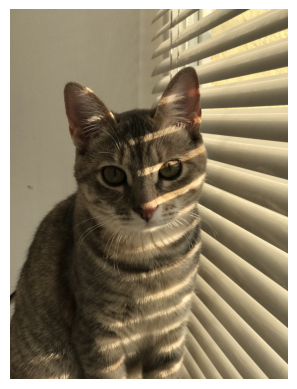

In [2]:
image = Image.open('lyusya3.jpg')
plt.imshow(image)
plt.axis('off')
print('Size:',os.path.getsize('lyusya3.jpg'))

In [3]:
image.save('compr_lyusya.jpg', format='JPEG', quality=20, optimize=True)

Compressed size: 279427


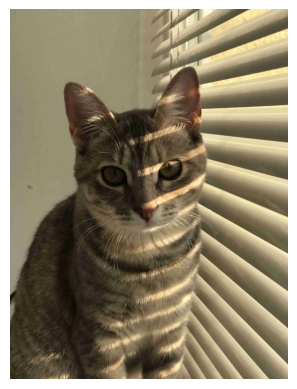

In [4]:
image = Image.open('compr_lyusya.jpg')
plt.imshow(image)
plt.axis('off')
print('Compressed size:',os.path.getsize('compr_lyusya.jpg'))

# Стиснення текстового файлу з використанням бібліотеки gzip

In [5]:
with open('text.txt', 'rt') as file_in:
    with gzip.open('text.gz', 'wt') as file_out:
        file_out.writelines(file_in)

print('Done')

Done


In [6]:
print(f"Size: {os.path.getsize('text.txt')}")
print(f"Compressed size: {os.path.getsize('text.gz')}")

Size: 395
Compressed size: 268


# Стиснення та розпакування текстового файлу за допомогою алгоритму Хаффмана

In [7]:
class Nodes:  
    def __init__(self, probability, symbol, left = None, right = None):  

        self.probability = probability  

        self.symbol = symbol  

        self.left = left  

        self.right = right  
   
        self.code = ''  
        
def CalculateProbability(the_data):  
    the_symbols = dict()  
    for item in the_data:  
        if the_symbols.get(item) == None:  
            the_symbols[item] = 1  
        else:   
            the_symbols[item] += 1       
    return the_symbols  
  
the_codes = dict()  
  
def CalculateCodes(node, value = ''):  
    # a huffman code for current node  
    newValue = value + str(node.code)  
  
    if(node.left):  
        CalculateCodes(node.left, newValue)  
    if(node.right):  
        CalculateCodes(node.right, newValue)  
  
    if(not node.left and not node.right):  
        the_codes[node.symbol] = newValue  
           
    return the_codes  

def OutputEncoded(the_data, coding):  
    encodingOutput = []  
    for element in the_data:  
        # print(coding[element], end = '')  
        encodingOutput.append(coding[element])  
          
    the_string = ''.join([str(item) for item in encodingOutput])      
    return the_string  
           
def TotalGain(the_data, coding):   
    beforeCompression = len(the_data) * 8  
    afterCompression = 0  
    the_symbols = coding.keys()  
    for symbol in the_symbols:  
        the_count = the_data.count(symbol)  
        afterCompression += the_count * len(coding[symbol])  

def HuffmanEncoding(the_data):  
    symbolWithProbs = CalculateProbability(the_data)  
    the_symbols = symbolWithProbs.keys()  
    the_probabilities = symbolWithProbs.values()  
    print("symbols: ", the_symbols)  
    print("probabilities: ", the_probabilities)  
      
    the_nodes = []  

    for symbol in the_symbols:  
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))  
      
    while len(the_nodes) > 1:  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)  
        
        right = the_nodes[0]  
        left = the_nodes[1]  
      
        left.code = 0  
        right.code = 1  

        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)  
      
        the_nodes.remove(left)  
        the_nodes.remove(right)  
        the_nodes.append(newNode)  
              
    huffmanEncoding = CalculateCodes(the_nodes[0])  
    print("symbols with codes", huffmanEncoding)  
    TotalGain(the_data, huffmanEncoding)  
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)  
    return encodedOutput, the_nodes[0]  
   
def HuffmanDecoding(encodedData, huffmanTree):  
    treeHead = huffmanTree  
    decodedOutput = []  
    for x in encodedData:  
        if x == '1':  
            huffmanTree = huffmanTree.right     
        elif x == '0':  
            huffmanTree = huffmanTree.left  
        try:  
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:  
                pass  
        except AttributeError:  
            decodedOutput.append(huffmanTree.symbol)  
            huffmanTree = treeHead  
          
    string = ''.join([str(item) for item in decodedOutput])  
    return string  

In [8]:
with open('text.txt' , encoding='utf-8') as f:
    data = f.read()
print('Original text:\n\n', data) 

Original text:

 AI is a branch of computer science that deals with the creation of systems that can perform tasks that would normally require human intelligence. These systems can learn from data and are able to make decisions based on the analysis of information. The use of artificial intelligence can provide significant benefits in many industries, including medicine, transportation, finance, and business.


In [9]:
encoding, tree = HuffmanEncoding(data)  

symbols:  dict_keys(['A', 'I', ' ', 'i', 's', 'a', 'b', 'r', 'n', 'c', 'h', 'o', 'f', 'm', 'p', 'u', 't', 'e', 'd', 'l', 'w', 'y', 'k', 'q', 'g', '.', 'T', 'v', ','])
probabilities:  dict_values([1, 1, 59, 32, 26, 32, 5, 17, 34, 16, 10, 18, 11, 11, 4, 8, 26, 36, 11, 13, 2, 5, 2, 1, 4, 3, 2, 1, 4])
symbols with codes {'n': '0000', 'g': '0001000', 'p': '0001001', 'u': '000101', 'c': '00011', 'a': '0010', 'i': '0011', ' ': '010', 't': '0110', 's': '0111', 'l': '10000', 'd': '10001', 'm': '10010', 'f': '10011', '.': '1010000', 'v': '10100010', 'q': '10100011', 'y': '101001', 'h': '10101', 'o': '1011', 'e': '110', 'b': '111000', 'I': '11100100', 'A': '11100101', 'T': '1110011', 'k': '1110100', 'w': '1110101', ',': '111011', 'r': '1111'}


In [11]:
print('Encoded: ', encoding)  

Encoded:  111001011110010001000110111010001001011100011110010000000011101010101011100110100001110111001000010010001010110110111101001110001100111100000000111100100110101010010011001010001110001010000011101011101010011011010101010011010101110010000111111110001001100011101100000101011100110100111101001011101101101001001110100110101010010011001000011001000000100001001110111110011101111111001001001100010011111101000111010011010101001001100101110101101100010110000100010100000101111111001000101000010000101001010111111010100011000101001111111100101010100010110010001000000100011000001101101000010000001100010001100000000111101010000010111001110101110011111001001111010010111011011010010011101000011001000000101000011000101111000001010011111110111001001010001001001100010010001000001000101000101111110010001011100010000110010011010110101001000101110100110010100011100001100110111001110110000011101011100000100111110100010101011000001001101010111001000100000001010000101001011100110111010101110011010001

In [12]:
n = int(encoding, 2)
b = n.to_bytes((n.bit_length() + 7) // 8, 'big')

with open('text.cmpr', 'wb') as opened_file:
        opened_file.write(b)

In [13]:
print(f'Original size: {os.path.getsize("text.txt")}')
print(f'Compressed size: {os.path.getsize("text.cmpr")}')

Original size: 395
Compressed size: 209


In [14]:
with open('text.cmpr', mode='rb') as file:
    text = file.read()

In [15]:
code_ls = list(BitArray(text).bin)
while code_ls[0] == '0' and len(encoding) < len(code_ls) :    
    code_ls.pop(0)
str_code = ''.join(code_ls)   

In [16]:
print('Restored text:\n\n', HuffmanDecoding(str_code, tree))  

Restored text:

 AI is a branch of computer science that deals with the creation of systems that can perform tasks that would normally require human intelligence. These systems can learn from data and are able to make decisions based on the analysis of information. The use of artificial intelligence can provide significant benefits in many industries, including medicine, transportation, finance, and business.
